<a href="https://colab.research.google.com/github/SergeyShchus/Automatic_GIS/blob/master/SergeyShchus%20/%20Automatic_GIS/Rasterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import urllib
import urllib.parse
import requests

def get_filename(url):
    """
    Parses filename from given url
    """
    if url.find('/'):
        return url.rsplit('/', 1)[1]

# Filepaths
outdir = r"content/"

# File locations
url_list = ["https://github.com/Automating-GIS-processes/CSC18/raw/master/data/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif"]

# Create folder if it does no exist
if not os.path.exists(outdir):
    os.makedirs(outdir)

# Download files
for url in url_list:
    # Parse filename
    fname = get_filename(url)
    outfp = os.path.join(outdir, fname)
    # Download the file if it does not exist already
    if not os.path.exists(outfp):
        print("Downloading", fname)
        r = urllib.request.urlretrieve(url, outfp)

In [5]:
!pip install rasterio

import rasterio
import os
import numpy as np
%matplotlib inline

# Data dir
data_dir = "/content/content"
fp = os.path.join(data_dir, "Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif")

# Open the file:
raster = rasterio.open(fp)

# Check type of the variable 'raster'
type(raster)

     |████████████████████████████████| 19.1MB 244kB/s 


rasterio.io.DatasetReader

In [15]:
print(type(raster))
# Projection
print(raster.crs)
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
print(raster.transform)
# Dimensions
print(raster.width)
print(raster.height)
# Number of bands
print (raster.count)
# Bounds of the file
print(raster.bounds)
# Driver (data format)
print(raster.driver)
# No data values for all channels
print (raster.nodatavals)
# All Metadata for the whole raster dataset
print (raster.meta)

<class 'rasterio.io.DatasetReader'>
PROJCS["UTM Zone 0, Northern Hemisphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-183],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
| 28.50, 0.00, 698592.00|
| 0.00,-28.50, 6697870.50|
| 0.00, 0.00, 1.00|
1288
1439
7
BoundingBox(left=698592.0, bottom=6656859.0, right=735300.0, top=6697870.5)
GTiff
(None, None, None, None, None, None, None)
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1288, 'height': 1439, 'count': 7, 'crs': CRS.from_wkt('PROJCS["UTM Zone 0, Northern Hemisphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPH

In [16]:
# Read the raster band as separate variable
band1 = raster.read(1)

# Check type of the variable 'band'
print(type(band1))

# Data type of the values
print(band1.dtype)

<class 'numpy.ndarray'>
uint8


In [17]:
# Read all bands
array = raster.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each channel
stats

[{'max': 255, 'mean': 59.63132232528628, 'median': 61.0, 'min': 0},
 {'max': 255, 'mean': 43.13342814842951, 'median': 43.0, 'min': 0},
 {'max': 255, 'mean': 36.29418775547201, 'median': 31.0, 'min': 0},
 {'max': 255, 'mean': 35.0946303937776, 'median': 13.0, 'min': 0},
 {'max': 255, 'mean': 37.63263502518571, 'median': 13.0, 'min': 0},
 {'max': 175, 'mean': 105.8221477777442, 'median': 114.0, 'min': 0},
 {'max': 255, 'mean': 26.28348760569581, 'median': 14.0, 'min': 0}]

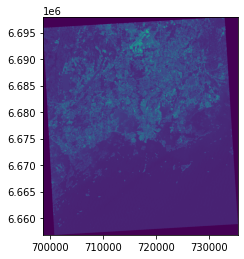

In [23]:
from rasterio.plot import show

show((raster, 3))

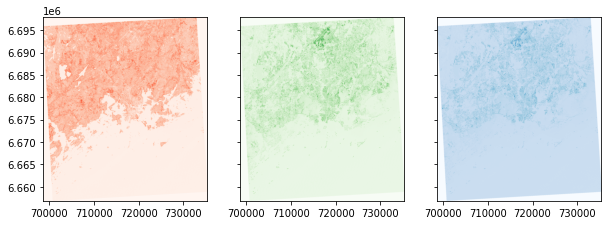

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
show((raster, 4), cmap='Reds', ax=ax1)
show((raster, 3), cmap='Greens', ax=ax2)
show((raster, 1), cmap='Blues', ax=ax3)